# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

## Scenario 1:
You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year.



Calculate the yearly liquor sales for each score using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.
Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of each store. You must use the sales from Jan to March per store as one of your variables.
Use your model for 2015 to estimate total sales for each store in 2016, extrapolating from the sales so far for Jan-March of 2016.
Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.
Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.

In [91]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import datasets, linear_model, metrics

## Load the data into a DataFrame
df = pd.read_csv('/Users/lesliepham/Desktop/DSI extras/Iowa_Liquor_sales_sample_10pct.csv')
df.sort("Item Number")

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1904,03/30/2016,3928,NORTH LIBERTY,52317,52.0,Johnson,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,168,Pinnacle Peach w/ Punch Dispenser,750,$7.35,$11.03,2,$22.06,1.50,0.40
259696,12/22/2015,3869,CORALVILLE,52241,52.0,Johnson,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,2,$58.74,1.50,0.40
91040,12/29/2015,4129,AMES,50010,85.0,Story,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,12,$352.44,9.00,2.38
261947,12/03/2015,2248,DES MOINES,50312,77.0,Polk,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,36,$1057.32,27.00,7.13
151517,12/15/2015,2665,WAUKEE,50263,25.0,Dallas,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,12,$352.44,9.00,2.38
239004,12/22/2015,2513,IOWA CITY,52240,52.0,Johnson,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,12,$352.44,9.00,2.38
13557,03/24/2016,2248,DES MOINES,50312,77.0,Polk,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,36,$1057.32,27.00,7.13
170053,11/30/2015,4152,MISSOURI VALLEY,51555,43.0,Harrison,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,1,$29.37,0.75,0.20
84096,12/22/2015,2512,IOWA CITY,52240,52.0,Johnson,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,12,$352.44,9.00,2.38
214193,12/18/2015,2512,IOWA CITY,52240,52.0,Johnson,1701100.0,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,$19.58,$29.37,12,$352.44,9.00,2.38


### remove unnecessary columns

In [62]:
del df["Category Name"]
del df["Item Description"]
del df["County"]

### Remove '$' 

In [95]:
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [100]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")


In [96]:
df = df.dropna()

In [97]:
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85,Story,1071100,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99,Wright,1031080,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [101]:
dates = df.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

lower_cutoff = pd.Timestamp("20150301")
upper_cutoff = pd.Timestamp("20151001")
mask = (dates['Date amin'] < lower_cutoff) & (dates['Date amax'] > upper_cutoff)
good_stores = dates[mask]["Store Number"]
df = df[df["Store Number"].isin(good_stores)]

In [102]:
df["Margin"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]
df["Price per Liter"] = df["Sale (Dollars)"] / df["Volume Sold (Liters)"]
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,27.00,9.000000
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,13.76,27.506667
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,151.20,18.890000
3,2016-02-03,2501,AMES,50010,85,Story,1071100,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,28.50,8.142857
4,2015-08-18,3654,BELMOND,50421,99,Wright,1031080,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,43.20,6.171429


In [72]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [73]:
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

sales = sales.groupby(by=["Store Number"], as_index=False)

sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0],
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})

sales.columns = [' '.join(col).strip() for col in sales.columns.values]

sales.head()

,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean
0,2106,CEDAR FALLS,146326.22,277.658861,7,17.856601,50613,9731.85,18.466509,92.671879
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932
2,2130,WATERLOO,111871.43,285.386301,7,16.835809,50703,6891.37,17.580026,95.217347
3,2152,ROCKWELL,7721.08,54.759433,17,13.020765,50469,633.37,4.491986,18.351277
4,2178,WAUKON,24324.18,102.633671,3,16.053844,52172,1917.12,8.089114,34.454430


In [110]:
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q1"] = df2["Sale (Dollars)"]

# Sales 2016 Q1
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
df.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df2 = df[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2016 Sales Q1"] = df2["Sale (Dollars)"]

sales.head(10)

,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean,2015 Sales Q1,2016 Sales Q1,First Date,Last Date
0,2106,CEDAR FALLS,146326.22,277.658861,7,17.856601,50613,9731.85,18.466509,92.671879,39287.29,30478.75,2015-01-08,2016-03-31
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932,2833.25,2065.90,2015-01-07,2016-03-23
2,2130,WATERLOO,111871.43,285.386301,7,16.835809,50703,6891.37,17.580026,95.217347,24272.57,27856.11,2015-01-08,2016-03-31
3,2152,ROCKWELL,7721.08,54.759433,17,13.020765,50469,633.37,4.491986,18.351277,2003.46,904.66,2015-01-08,2016-02-25
4,2178,WAUKON,24324.18,102.633671,3,16.053844,52172,1917.12,8.089114,34.454430,5856.41,5588.50,2015-01-07,2016-03-30
5,2190,DES MOINES,121689.06,92.539209,77,23.306227,50314,6322.17,4.807734,30.888008,29452.92,31803.06,2015-01-05,2016-03-31
6,2191,KEOKUK,125093.49,209.888406,56,19.064053,52632,8053.32,13.512282,70.040923,29085.57,47338.20,2015-01-05,2016-03-28
7,2200,SAC CITY,22811.55,56.604342,81,16.706969,50583,1817.24,4.509280,18.991241,4900.43,4174.87,2015-01-07,2016-03-30
8,2205,CLARINDA,24623.01,85.794460,73,19.093713,51632,1555.41,5.419547,28.657387,6407.74,3086.38,2015-01-06,2015-12-28
9,2228,WINTERSET,17462.07,72.758625,61,17.890101,50273,1367.65,5.698542,24.351417,5193.97,6522.65,2015-01-06,2016-03-29


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

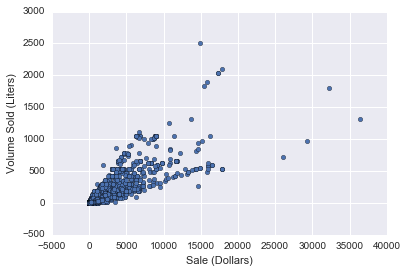

In [75]:
df.plot.scatter(x='Sale (Dollars)', y='Volume Sold (Liters)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17aae1850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18affe0d0>]], dtype=object)

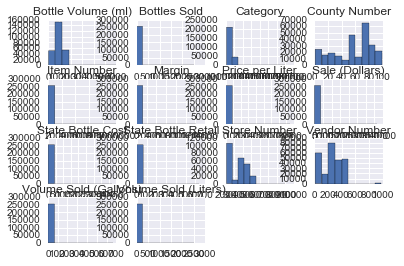

In [108]:
df.hist()

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [76]:
df.columns


Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'Category', u'Vendor Number', u'Item Number', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)',
       u'Margin', u'Price per Liter'],
      dtype='object')

In [77]:
df.corr()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
Store Number,1.000000,0.000465,-0.011988,-0.004736,-0.023875,-0.056431,-0.069682,-0.069806,0.016382,-0.015554,-0.015288,-0.015278,-0.015507,-0.019060
County Number,0.000465,1.000000,-0.005762,0.001793,0.007495,-0.028846,0.012887,0.012814,0.019365,0.020383,0.010421,0.010430,0.020160,0.032447
Category,-0.011988,-0.005762,1.000000,0.090853,0.115571,-0.010933,-0.015927,-0.016113,0.000148,0.006584,-0.004229,-0.004221,0.006227,-0.020518
Vendor Number,-0.004736,0.001793,0.090853,1.000000,0.135383,0.024227,0.002479,0.002093,-0.002732,-0.012846,-0.007847,-0.007844,-0.013276,0.010979
Item Number,-0.023875,0.007495,0.115571,0.135383,1.000000,-0.057653,0.100117,0.099854,-0.005111,0.002889,-0.010316,-0.010306,0.002538,0.163145
Bottle Volume (ml),-0.056431,-0.028846,-0.010933,0.024227,-0.057653,1.000000,0.306841,0.307821,-0.009598,0.082095,0.155929,0.155762,0.082519,-0.304428
State Bottle Cost,-0.069682,0.012887,-0.015927,0.002479,0.100117,0.306841,1.000000,0.999960,-0.060553,0.134663,0.008804,0.008774,0.133614,0.739730
State Bottle Retail,-0.069806,0.012814,-0.016113,0.002093,0.099854,0.307821,0.999960,1.000000,-0.060411,0.134839,0.009235,0.009205,0.133832,0.739293
Bottles Sold,0.016382,0.019365,0.000148,-0.002732,-0.005111,-0.009598,-0.060553,-0.060411,1.000000,0.826921,0.885223,0.885252,0.828507,-0.061111
Sale (Dollars),-0.015554,0.020383,0.006584,-0.012846,0.002889,0.082095,0.134663,0.134839,0.826921,1.000000,0.847284,0.847295,0.999805,0.062687


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

r^2: 0.717890520059


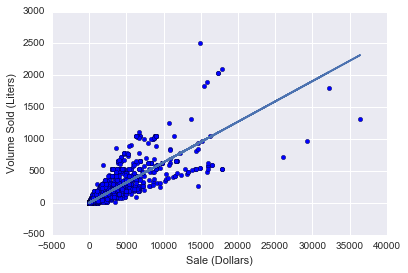

In [83]:
lm = linear_model.LinearRegression()

X = df[["Sale (Dollars)"]]
y = df["Volume Sold (Liters)"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("Volume Sold (Liters)")
plt.xlabel("Sale (Dollars)")
print "r^2:", model.score(X,y)

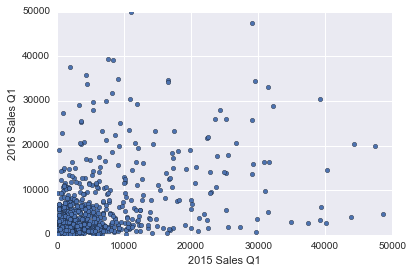

In [104]:
sales.plot(kind='scatter', x="2015 Sales Q1", y="2016 Sales Q1");
plt.xlim(0, 50000)
plt.ylim(0, 50000)

sales["First Date"] = dates['Date amin']
sales["Last Date"] = dates['Date amax']

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [84]:
sales.columns

Index([u'Store Number', u'City <lambda>', u'Sale (Dollars) sum',
       u'Sale (Dollars) mean', u'County Number <lambda>',
       u'Price per Liter mean', u'Zip Code <lambda>',
       u'Volume Sold (Liters) sum', u'Volume Sold (Liters) mean',
       u'Margin mean'],
      dtype='object')

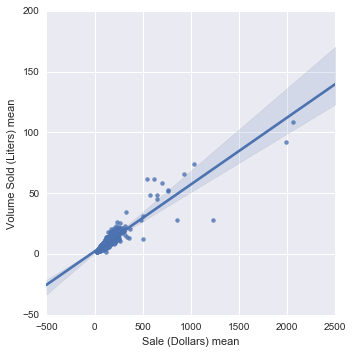

In [89]:
sns.lmplot(x="Sale (Dollars) mean", y="Volume Sold (Liters) mean", data=sales)
sns.plt.show()


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

This dataset presents information of liquor sales in Iowa through volumes sold, prices, counties, and types of liquor. I decided to focus on sales over periods of time and regions to report to the Iowa State Tax board. What I have concluded in my analysis is that Q1 sales were higher in 2015 compared to 2016. With the information of sales per store we notice that the top selling stores are in Polk county, Linn county, Scott county, Black Hawk county, and Johnson county. Within these counties the State Retail Cost is about twice the State Bottle Cost which means these stores make quite a lot of profit. From these top-selling stores we can slightly raise taxes to increase state revenue if the state is the primary stakeholder. If we are considering the individual sales per store then we might want to lower taxes in order to surpass the 2015 year sales. 